In [1]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
from matplotlib import pyplot as plt

In [11]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [12]:
len(cifar10)

50000

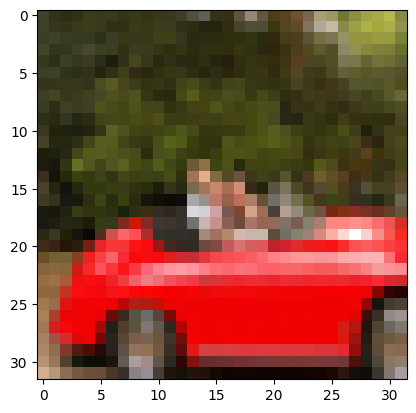

In [13]:
plt.imshow(img)
plt.show()

In [14]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [15]:
from torchvision import transforms 
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [16]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
transform=transforms.ToTensor())

In [17]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [18]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [19]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

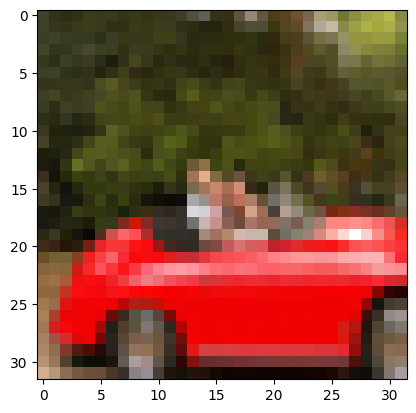

In [20]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [22]:
import torch

In [23]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [24]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [25]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [26]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [27]:
transformed_cifar10 = datasets.CIFAR10(
data_path, train=True, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.4915, 0.4823, 0.4468),
(0.2470, 0.2435, 0.2616))]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806982..2.126078].


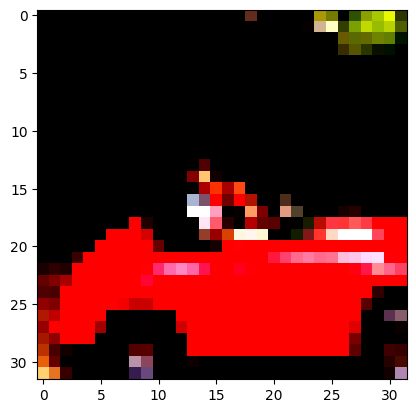

In [28]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [29]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
for img, label in cifar10
if label in [0, 2]]
cifar2_val = [(img, label_map[label])
for img, label in cifar10_val
if label in [0, 2]]

In [30]:
import torch.nn as nn
n_out = 2
model = nn.Sequential(nn.Linear(3072,512,),nn.Tanh(),nn.Linear(512,n_out,))

In [32]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [34]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [35]:
softmax(x).sum()

tensor(1.)

In [36]:
softmax = nn.Softmax(dim=1)
x = torch.tensor([[1.0, 2.0, 3.0],
[1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [37]:
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, 2),
nn.Softmax(dim=1))

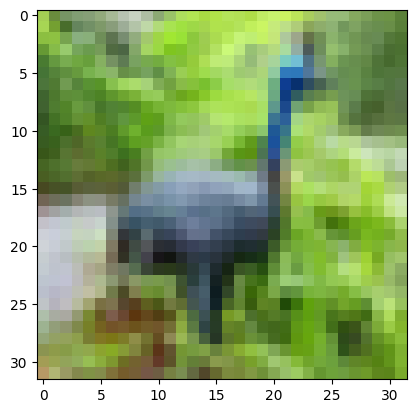

In [39]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Convertir la imagen de PIL a un tensor
img, _ = cifar2[0]
img_tensor = transforms.ToTensor()(img)

# Usar permute para cambiar las dimensiones del tensor
plt.imshow(img_tensor.permute(1, 2, 0))
plt.show()

In [41]:
# Convertir la imagen PIL a un tensor
img_tensor = transforms.ToTensor()(img)

# Ajustar las dimensiones del tensor
img_batch = img_tensor.view(-1).unsqueeze(0)

In [42]:
out = model(img_batch)
out

tensor([[0.4404, 0.5596]], grad_fn=<SoftmaxBackward0>)

In [43]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [44]:
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, 2),
nn.LogSoftmax(dim=1))

In [45]:
loss = nn.NLLLoss()

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
model = nn.Sequential(
nn.Linear(3072, 512),
nn.Tanh(),
nn.Linear(512, 2),
nn.LogSoftmax(dim=1))
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    for img, label in cifar2:
        img_tensor = transforms.ToTensor()(img)
        out = model(img_tensor.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.167313
Epoch: 1, Loss: 1.595991
Epoch: 2, Loss: 1.892263
Epoch: 3, Loss: 2.588190
Epoch: 4, Loss: 2.520221
Epoch: 5, Loss: 2.779908
Epoch: 6, Loss: 3.325322
Epoch: 7, Loss: 3.499394
Epoch: 8, Loss: 4.457149
Epoch: 9, Loss: 5.169694
Epoch: 10, Loss: 5.515480
Epoch: 11, Loss: 5.200143
Epoch: 12, Loss: 6.269173
Epoch: 13, Loss: 5.839141
Epoch: 14, Loss: 10.243066
Epoch: 15, Loss: 7.903912
Epoch: 16, Loss: 8.558885
Epoch: 17, Loss: 5.409688
Epoch: 18, Loss: 8.879016
Epoch: 19, Loss: 11.392681
Epoch: 20, Loss: 3.307107
Epoch: 21, Loss: 3.997205
Epoch: 22, Loss: 11.239747
Epoch: 23, Loss: 10.180034
Epoch: 24, Loss: 6.617332
Epoch: 25, Loss: 3.615307
Epoch: 26, Loss: 5.664423
Epoch: 27, Loss: 13.418979
Epoch: 28, Loss: 5.529212
Epoch: 29, Loss: 3.368875
Epoch: 30, Loss: 4.468573
Epoch: 31, Loss: 6.459713
Epoch: 32, Loss: 12.872392
Epoch: 33, Loss: 12.546602
Epoch: 34, Loss: 4.125633
Epoch: 35, Loss: 3.583942
Epoch: 36, Loss: 3.636808
Epoch: 37, Loss: 16.043144
Epoch: 38, Los

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import CIFAR10

# Definir las clases que te interesan (por ejemplo, "gatos" y "perros")
class_names = ['cat', 'dog']
class_map = {'cat': 3, 'dog': 5}  # CIFAR10: 3 = "cat", 5 = "dog"

transform = transforms.Compose([
    transforms.ToTensor()
])

cifar10 = CIFAR10(root='data', train=True, download=True, transform=transform)

cifar2_idx = [i for i, (_, label) in enumerate(cifar10) if label == class_map['cat'] or label == class_map['dog']]
cifar2 = Subset(cifar10, cifar2_idx)

for i in range(len(cifar2)):
    img, label = cifar2[i]
    cifar2.dataset.targets[cifar2_idx[i]] = 0 if label == class_map['cat'] else 1

train_loader = DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

n_epochs = 100
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))  # Aplanar las imágenes
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch}, Loss: {loss.item():.6f}")



Files already downloaded and verified
Epoch: 0, Loss: 0.635988
Epoch: 1, Loss: 0.689838
Epoch: 2, Loss: 0.590547
Epoch: 3, Loss: 0.715875
Epoch: 4, Loss: 0.594685
Epoch: 5, Loss: 0.628129
Epoch: 6, Loss: 0.673145
Epoch: 7, Loss: 0.704807
Epoch: 8, Loss: 0.654804
Epoch: 9, Loss: 0.651801
Epoch: 10, Loss: 0.683248
Epoch: 11, Loss: 0.659740
Epoch: 12, Loss: 0.646214
Epoch: 13, Loss: 0.574708
Epoch: 14, Loss: 0.666773
Epoch: 15, Loss: 0.590226
Epoch: 16, Loss: 0.612670
Epoch: 17, Loss: 0.566597
Epoch: 18, Loss: 0.681613
Epoch: 19, Loss: 0.618099
Epoch: 20, Loss: 0.555231
Epoch: 21, Loss: 0.746691
Epoch: 22, Loss: 0.638486
Epoch: 23, Loss: 0.646224
Epoch: 24, Loss: 0.803265
Epoch: 25, Loss: 0.775950
Epoch: 26, Loss: 0.563110
Epoch: 27, Loss: 0.562675
Epoch: 28, Loss: 0.603208
Epoch: 29, Loss: 0.656371
Epoch: 30, Loss: 0.701824
Epoch: 31, Loss: 0.679992
Epoch: 32, Loss: 0.764866
Epoch: 33, Loss: 0.608760
Epoch: 34, Loss: 0.663438
Epoch: 35, Loss: 0.687133
Epoch: 36, Loss: 0.632130
Epoch: 37,

In [66]:
import torchvision.transforms as transforms
import torch
transform = transforms.Compose([
    transforms.ToTensor()
])
cifar2_val = CIFAR10(root='data', train=False, download=True, transform=transform)

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))  # Aplanar las imágenes
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

accuracy = correct / total
print("Accuracy: %f" % accuracy)

Files already downloaded and verified
Accuracy: 0.108100


In [67]:
model = nn.Sequential(
nn.Linear(3072, 1024),
nn.Tanh(),
nn.Linear(1024, 512),
nn.Tanh(),
nn.Linear(512, 128),
nn.Tanh(),
nn.Linear(128, 2),
nn.LogSoftmax(dim=1))

In [68]:
model = nn.Sequential(
nn.Linear(3072, 1024),
nn.Tanh(),
nn.Linear(1024, 512),
nn.Tanh(),
nn.Linear(512, 128),
nn.Tanh(),
nn.Linear(128, 2))
loss_fn = nn.CrossEntropyLoss()

In [69]:
numel_list = [p.numel()
for p in connected_model.parameters()
if p.requires_grad == True]
sum(numel_list), numel_list

NameError: name 'connected_model' is not defined

In [56]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

NameError: name 'first_model' is not defined

In [57]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))